# Librerias

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import locale
import calendar
locale.setlocale(locale.LC_TIME, 'es_ES')

'es_ES'

# Lectura de datos

In [4]:
# Cargar el archivo .nc utilizando xarray
data_boyaca = xr.open_dataset('../data/data_boyaca_final.nc')
df_boyaca = data_boyaca.to_dataframe().reset_index(drop=True)

# Leer el shapefile con los municipios de Boyacá
gdf_boyaca = gpd.read_file('../shapes/MGN_MPIO_POLITICO.shp')
# Seleccionar solo BOYACÁ
gdf_boyaca = gdf_boyaca[gdf_boyaca['DPTO_CNMBR'] == 'BOYACÁ']
# Dejar solo las columnas geometry y MPIO_CNMBR
gdf_boyaca = gdf_boyaca[['geometry', 'MPIO_CNMBR']]
# Renoimbrar la columna MPIO_CNMBR a municipio
gdf_boyaca.rename(columns={'MPIO_CNMBR': 'municipality'}, inplace=True)
# Capitalizar los nombres de los municipios
gdf_boyaca['municipality'] = gdf_boyaca['municipality'].str.capitalize()

In [16]:
df_boyaca['time'] = pd.to_datetime(df_boyaca['time'])
df_boyaca['year'] = df_boyaca['time'].dt.year.astype(str)
df_boyaca['month'] = df_boyaca['time'].dt.month.apply(lambda x: calendar.month_name[x]).str.capitalize()

In [ ]:
# merge entre df_boyaca y df_shapefile_boyaca por municipality
# df_boyaca = pd.merge(df_boyaca, gdf_boyaca, on='municipality')

# Formatos archivos

In [5]:
# Verificar los nombres de las variables disponibles
print(df_boyaca)

# Muestra el formato
print('shapefile : ',gdf_boyaca)

          latitude  longitude       time     precip        municipality
0         4.674999 -73.175003 1981-01-01   6.424949  San Luis de Gaceno
1         4.674999 -73.175003 1981-01-02   0.000000  San Luis de Gaceno
2         4.674999 -73.175003 1981-01-03   0.000000  San Luis de Gaceno
3         4.674999 -73.175003 1981-01-04   0.000000  San Luis de Gaceno
4         4.674999 -73.175003 1981-01-05   0.000000  San Luis de Gaceno
...            ...        ...        ...        ...                 ...
11664718  7.024998 -72.075005 2023-05-27  18.020945              Cubará
11664719  7.024998 -72.075005 2023-05-28  18.020945              Cubará
11664720  7.024998 -72.075005 2023-05-29   0.000000              Cubará
11664721  7.024998 -72.075005 2023-05-30  36.041889              Cubará
11664722  7.024998 -72.075005 2023-05-31  54.062836              Cubará

[11664723 rows x 5 columns]
shapefile :                                                geometry         municipality
201  POLYGON ((-73

# Diagrama de cajas y bigotes mensual para la precipitación de cada municipio

Las precipitaciones se clasifican según su intensidad:
- Moderadas: 2 a 15 mm/h.
- Fuertes: 15 a 30 mm/h.
- Muy fuertes: 30 a 60 mm/h.
- Torrenciales: más de 60 mm/h.

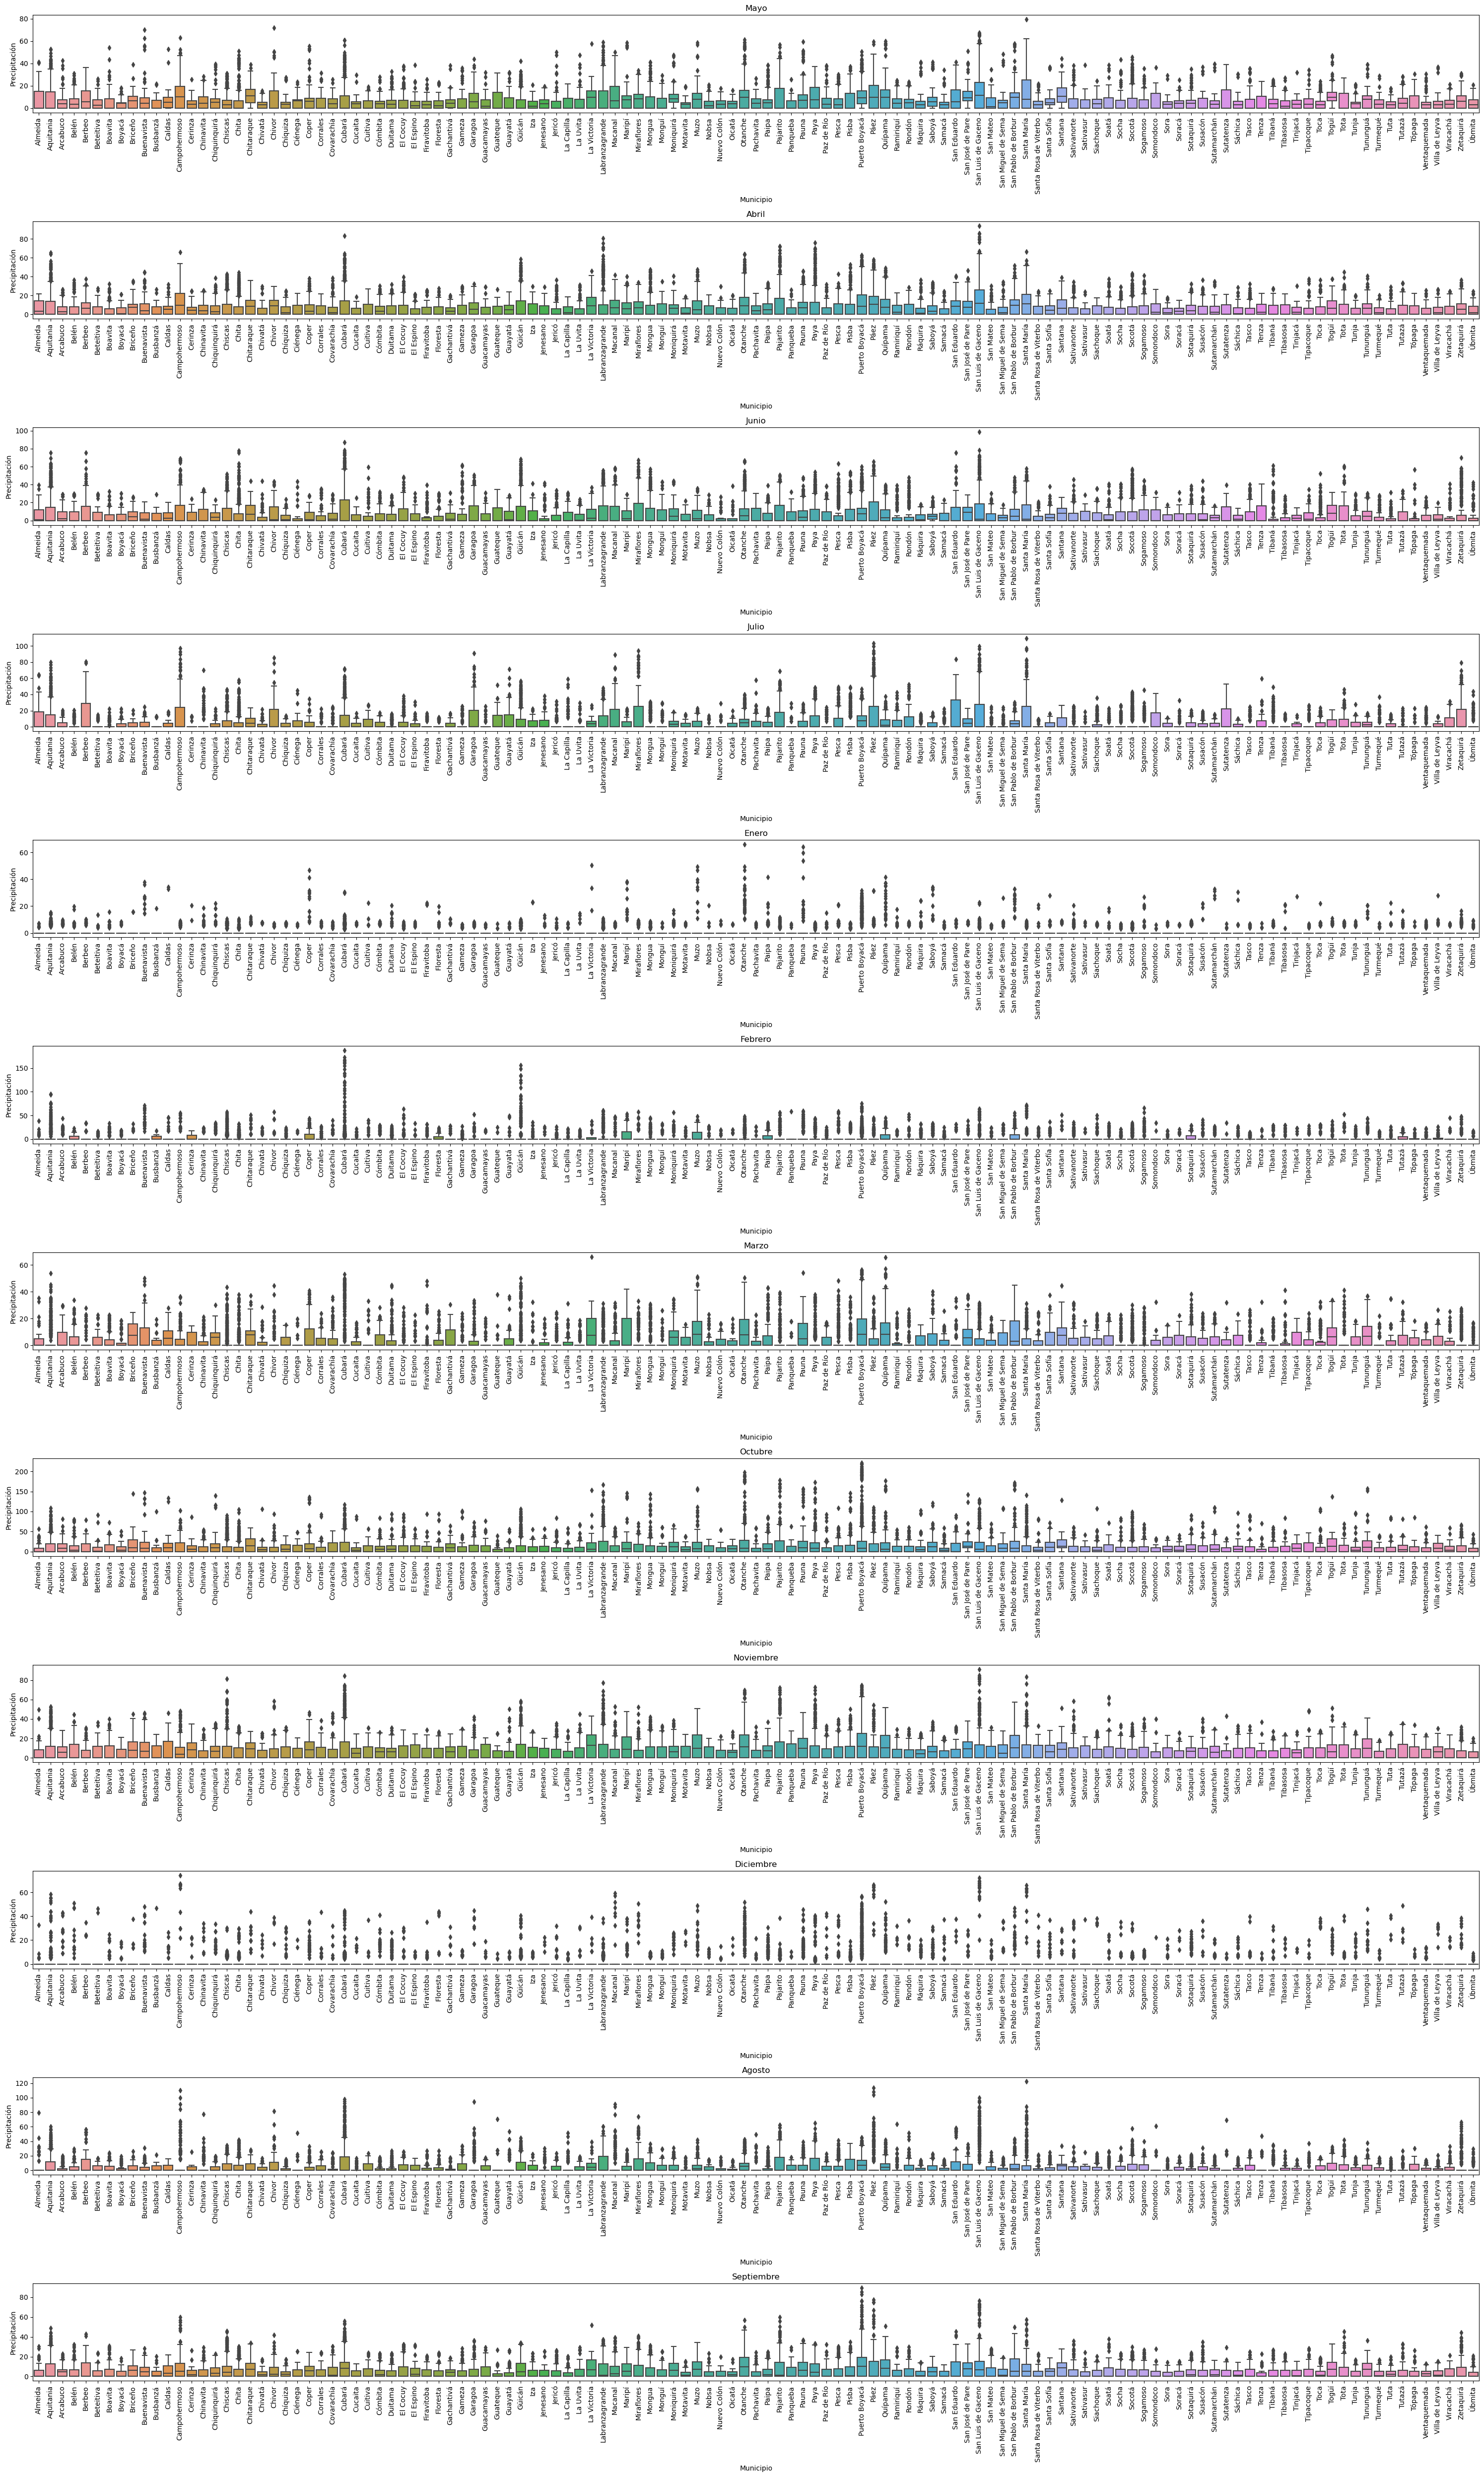

In [4]:
# Filtrar los datos para el año 2022
data_2022 = df_boyaca[df_boyaca['year'] == "2022"]

# Ordenar los datos por municipio
data_2022 = data_2022.sort_values(by=['municipality'])

# Graficar la precipitación mensual por cada municipio
fig, ax = plt.subplots(12,1,figsize=(30,50))

for i, month in enumerate(data_2022['month'].unique()):
    sns.boxplot(x='municipality',y='precip',data=data_2022[data_2022['month'] == month],ax=ax[i])
    ax[i].set_title(month)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_ylabel('Precipitación')
    ax[i].set_xlabel('Municipio')
    
plt.tight_layout()
plt.show()

# Tratamiento de datos anomalos

# Mapa de calor del promedio de la precipitación mensual para cada año

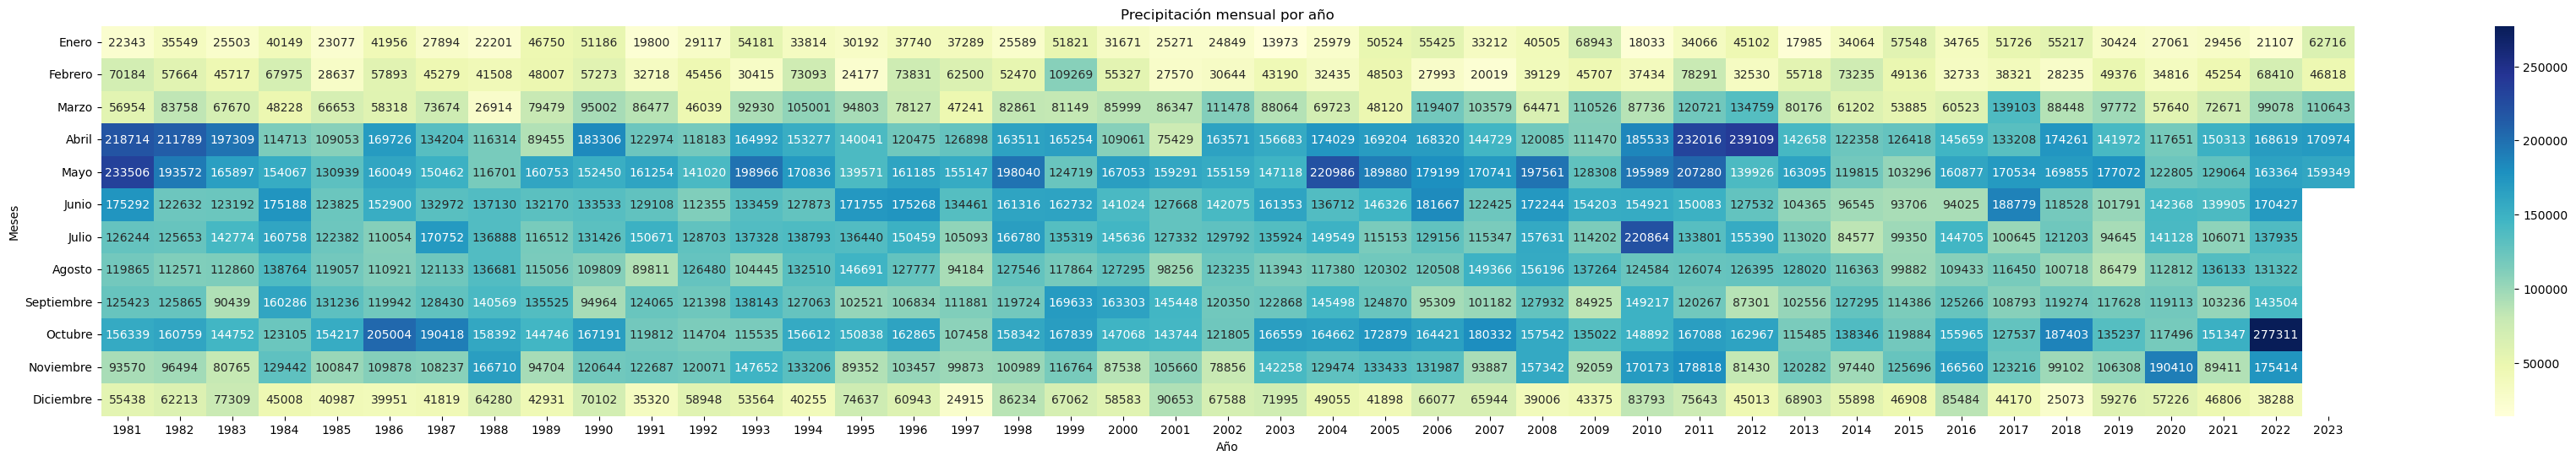

In [17]:
# Mapa de calor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener la precipitación mensual por año
monthly_precipitation_per_year = df_boyaca.groupby(['year','month'])['precip'].sum().reset_index()
monthly_precipitation_per_year['month'] = pd.Categorical(monthly_precipitation_per_year['month'], categories=[month.capitalize() for month in list(calendar.month_name)[1:]], ordered=True)

# Rellenar los meses faltantes con valores nulos
monthly_precipitation_per_year = monthly_precipitation_per_year.pivot_table(index='month', columns='year', values='precip')

# Crear el mapa de calor
plt.figure(figsize=(43, 6))

sns.heatmap(monthly_precipitation_per_year, cmap='YlGnBu', cbar=True, annot=True, fmt=".0f")

# Configurar los ejes y etiquetas
plt.xlabel('Año')
plt.ylabel('Meses')
plt.title('Precipitación mensual por año')

# Mostrar la figura
plt.show()

In [37]:
year = "2022"
municipality = "Tibasosa"

df_filtered = df_boyaca[(df_boyaca["year"] == year)]

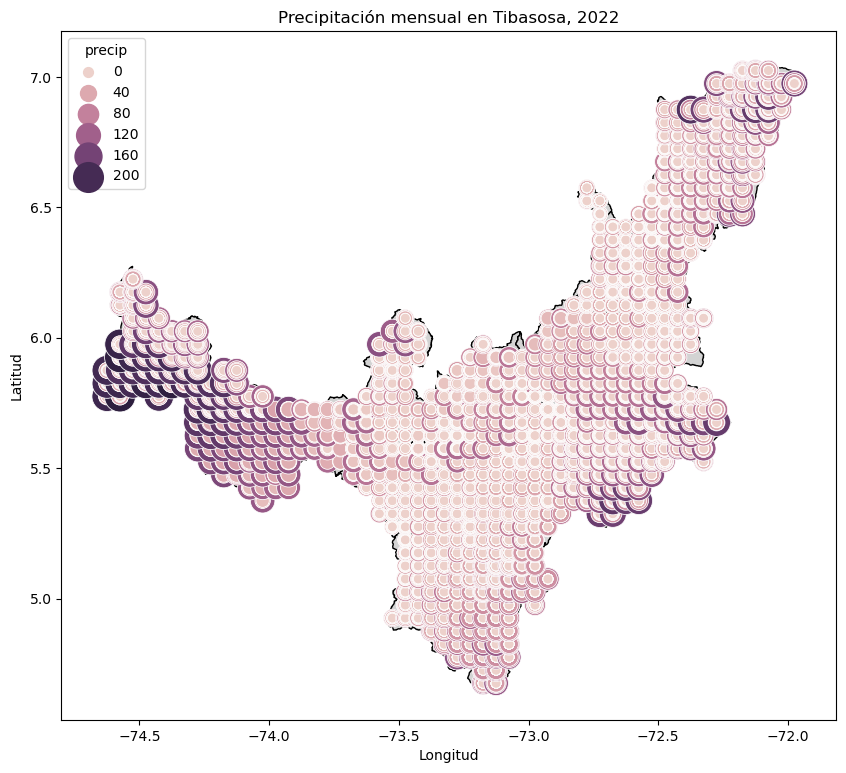

In [38]:
# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el mapa de Boyacá
gdf_boyaca.plot(ax=ax, color="lightgray", edgecolor="black")

# Graficar el mapa de calor sobre el mapa de Boyacá
sns.scatterplot(x="longitude", y="latitude", data=df_filtered, hue="precip", size="precip", sizes=(50, 500), ax=ax)

# Configurar el título y los ejes
ax.set_title(f"Precipitación mensual en {municipality}, {year}")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()


In [ ]:
# Filtrar el GeoDataFrame para el municipio seleccionado
municipio_seleccionado = "Tibasosa"
gdf_municipio = gdf_boyaca[gdf_boyaca["municipality"] == municipio_seleccionado]

# Filtrar los datos para el año seleccionado y el municipio seleccionado
anio_seleccionado = "2022"
df_filtrado = df_boyaca[(df_boyaca["year"] == anio_seleccionado) & (df_boyaca["municipality"] == municipio_seleccionado)]

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono del municipio
gdf_municipio.plot(ax=ax, color="lightgray", edgecolor="black")

# Graficar la precipitación mensual utilizando colores diferentes según las coordenadas
scatter = ax.scatter(df_filtrado["longitude"], df_filtrado["latitude"], c=df_filtrado["precip"], cmap="YlGnBu", s=50, edgecolors="black")

# Agregar etiquetas de coordenadas sobre cada punto
for x, y, lon, lat in zip(df_filtrado["longitude"], df_filtrado["latitude"], df_filtrado["longitude"], df_filtrado["latitude"]):
    ax.annotate(f"({lon:.2f}, {lat:.2f})", xy=(x, y), xytext=(5, 5), textcoords="offset points")

# Configurar la leyenda
cbar = fig.colorbar(scatter)
cbar.set_label("Precipitación mensual")

# Configurar el título y los ejes
ax.set_title(f"Precipitación mensual en {municipio_seleccionado}, {anio_seleccionado}")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()


In [ ]:
# Distancia entre coordenadas

import math

def calcular_distancia(lat1, lon1, lat2, lon2):
    # Radio promedio de la Tierra en kilómetros
    R = 6371.0

    # Convertir las coordenadas a radianes
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Diferencias de latitud y longitud
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Fórmula de Haversine
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distancia = R * c

    return distancia

# Coordenadas de ejemplo
# -73.0250015258789 5.724998474121094
# -72.97500610351562 5.724998474121094
# -73.0250015258789 5.724998474121094
# -72.97500610351562 5.724998474121094
# -73.0250015258789 5.774997711181641
lat1 = 5.724998474121094
lon1 = -73.0250015258789
lat2 = 5.724998474121094
lon2 = -72.97500610351562

# Calcular distancia
distancia_km = calcular_distancia(lat1, lon1, lat2, lon2)

print("Distancia:", distancia_km, "kilómetros")

C:\Users\JimmyZea\AppData\Local\Temp\ipykernel_18416\3832833023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtrado = df_filtrado.groupby(["latitude", "longitude"]).sum().reset_index()
C:\Users\JimmyZea\AppData\Local\Temp\ipykernel_18416\3832833023.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cbar)


559.39015896997
-73.0250015258789 5.724998474121094
559.39015896997
-72.97500610351562 5.724998474121094
559.4393154940228
-73.0250015258789 5.774997711181641


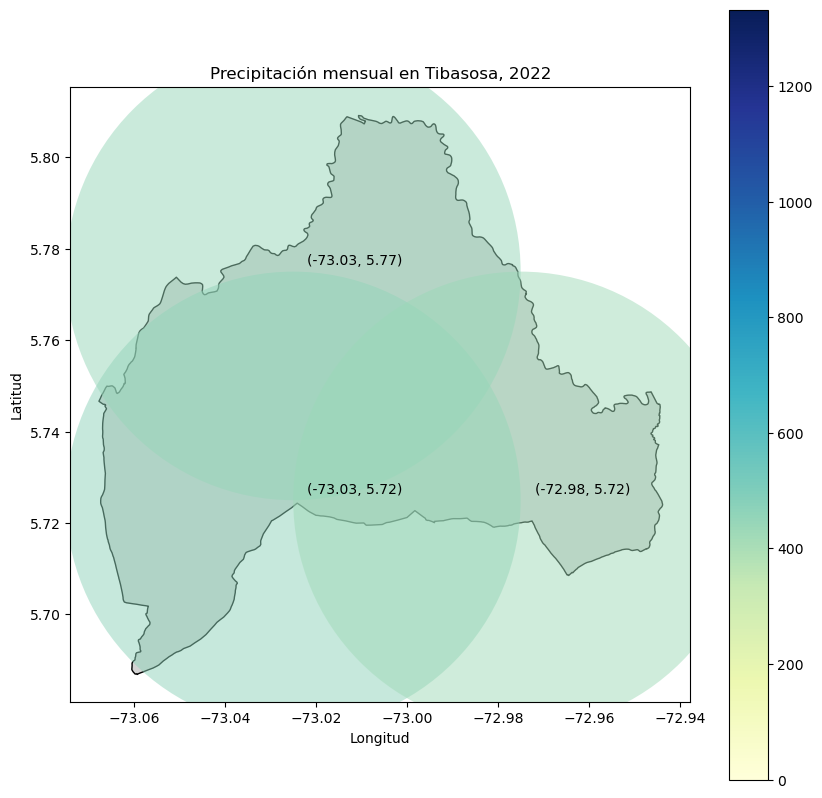

In [32]:
from matplotlib.patches import Circle
import math

# Filtrar el GeoDataFrame para el municipio seleccionado
municipio_seleccionado = "Tibasosa"
gdf_municipio = gdf_boyaca[gdf_boyaca["municipality"] == municipio_seleccionado]

# Filtrar los datos para el año seleccionado y el municipio seleccionado
anio_seleccionado = "2022"
df_filtrado = df_boyaca[(df_boyaca["year"] == anio_seleccionado) & (df_boyaca["municipality"] == municipio_seleccionado)]
# Agrupar por latitud y longitud y calcular la suma de la precipitación
df_filtrado = df_filtrado.groupby(["latitude", "longitude"]).sum().reset_index()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono del municipio
gdf_municipio.plot(ax=ax, color="lightgray", edgecolor="black")

# Graficar la precipitación mensual utilizando puntos de tamaño proporcional al radio
for x, y, precip in zip(df_filtrado["longitude"], df_filtrado["latitude"], df_filtrado["precip"]):
    circle = Circle((x, y), radius=0.05, facecolor=plt.cm.YlGnBu(precip / df_filtrado["precip"].sum()), alpha=0.5)
    ax.add_patch(circle)
    ax.annotate(f"({x:.2f}, {y:.2f})", xy=(x, y), xytext=(10, 5), textcoords="offset points")
    print(x, y)


# Configurar la leyenda
cbar = plt.cm.ScalarMappable(cmap="YlGnBu")
cbar.set_array(df_filtrado["precip"])
cbar.set_clim(0, df_filtrado["precip"].max())
fig.colorbar(cbar)

# Configurar el título y los ejes
ax.set_title(f"Precipitación mensual en {municipio_seleccionado}, {anio_seleccionado}")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()


## Mapa de calor para las diferentes coordenadas geográficas del municipio de Tibasosa

In [27]:
year = "2022"
municipality = "Tunja"
data_boyaca_2022 = df_boyaca[df_boyaca['year'] == year]
data_tibasosa_2022 = data_boyaca_2022[data_boyaca_2022['municipality'] == municipality]

# Hacer un groupby por latitud, longitud y mes
data_tibasosa_2022_group = data_tibasosa_2022.groupby(['latitude','longitude', 'month']).sum().reset_index()

C:\Users\BPS-EYDUARTE\AppData\Local\Temp\ipykernel_9644\236890974.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_tibasosa_2022_group = data_tibasosa_2022.groupby(['latitude','longitude', 'month']).sum().reset_index()


In [21]:
data_tibasosa_2022.groupby(['latitude','longitude']).sum().reset_index()

C:\Users\BPS-EYDUARTE\AppData\Local\Temp\ipykernel_9644\3821904974.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_tibasosa_2022.groupby(['latitude','longitude']).sum().reset_index()


latitude  longitude       precip
0  5.724998 -73.025002  1333.239624
1  5.724998 -72.975006  1220.894653
2  5.774998 -73.025002  1273.897461

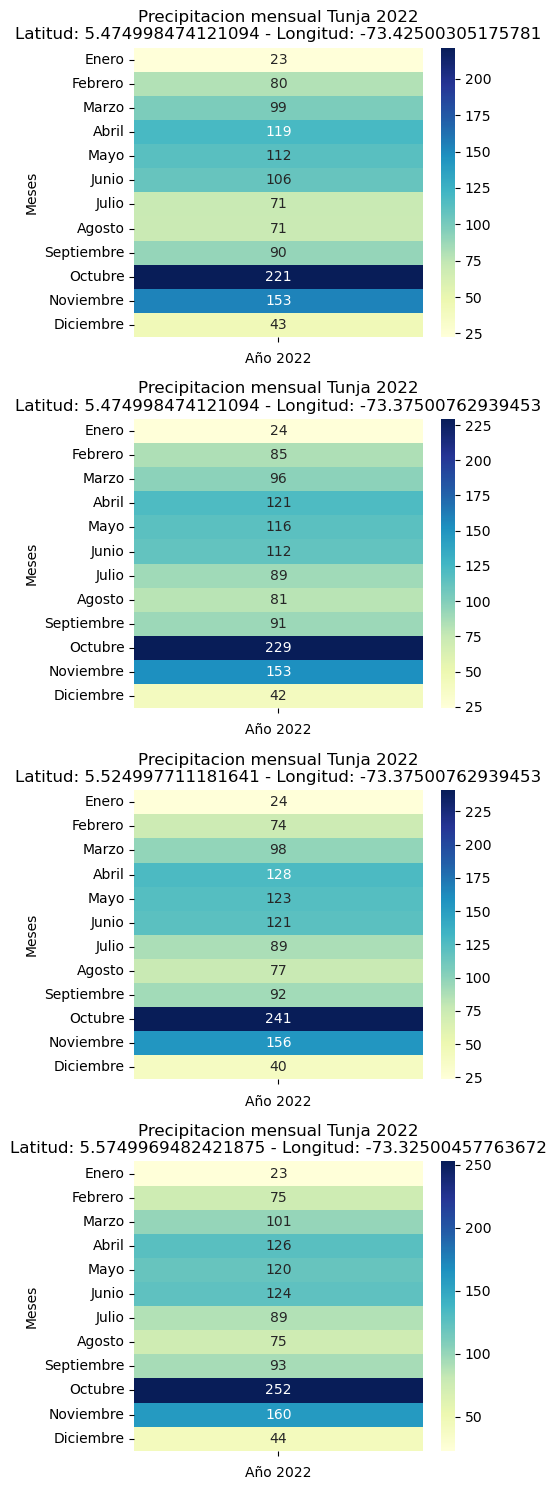

In [28]:
# Mapa de calor Tibasosa 

# Ordenar los datos por el mes
data_tibasosa_2022_group['month'] = pd.Categorical(data_tibasosa_2022_group['month'], categories=[month.capitalize() for month in list(calendar.month_name)[1:]], ordered=True)

# Numero de filas para el subplot, es la cantidad de pares de latitud y longitud
num_rows = len(data_tibasosa_2022_group.groupby(['latitude','longitude']))

fig, ax = plt.subplots(num_rows,1,figsize=(5,15))

for i, (lat, lon) in enumerate(data_tibasosa_2022_group.groupby(['latitude','longitude']).groups.keys()):
    sns.heatmap(data_tibasosa_2022_group[(data_tibasosa_2022_group['latitude'] == lat) & (data_tibasosa_2022_group['longitude'] == lon)].pivot_table(index='month', columns='latitude', values='precip'), cmap='YlGnBu', cbar=True, annot=True, fmt=".0f", ax=ax[i])
    ax[i].set_title(f'Precipitacion mensual {municipality} {year}\nLatitud: {lat} - Longitud: {lon}')
    ax[i].set_xlabel(f'Año {year}')
    # No mostrar el valor del eje x
    ax[i].set_xticklabels([])
    ax[i].set_ylabel('Meses')
    
plt.tight_layout()
plt.show()

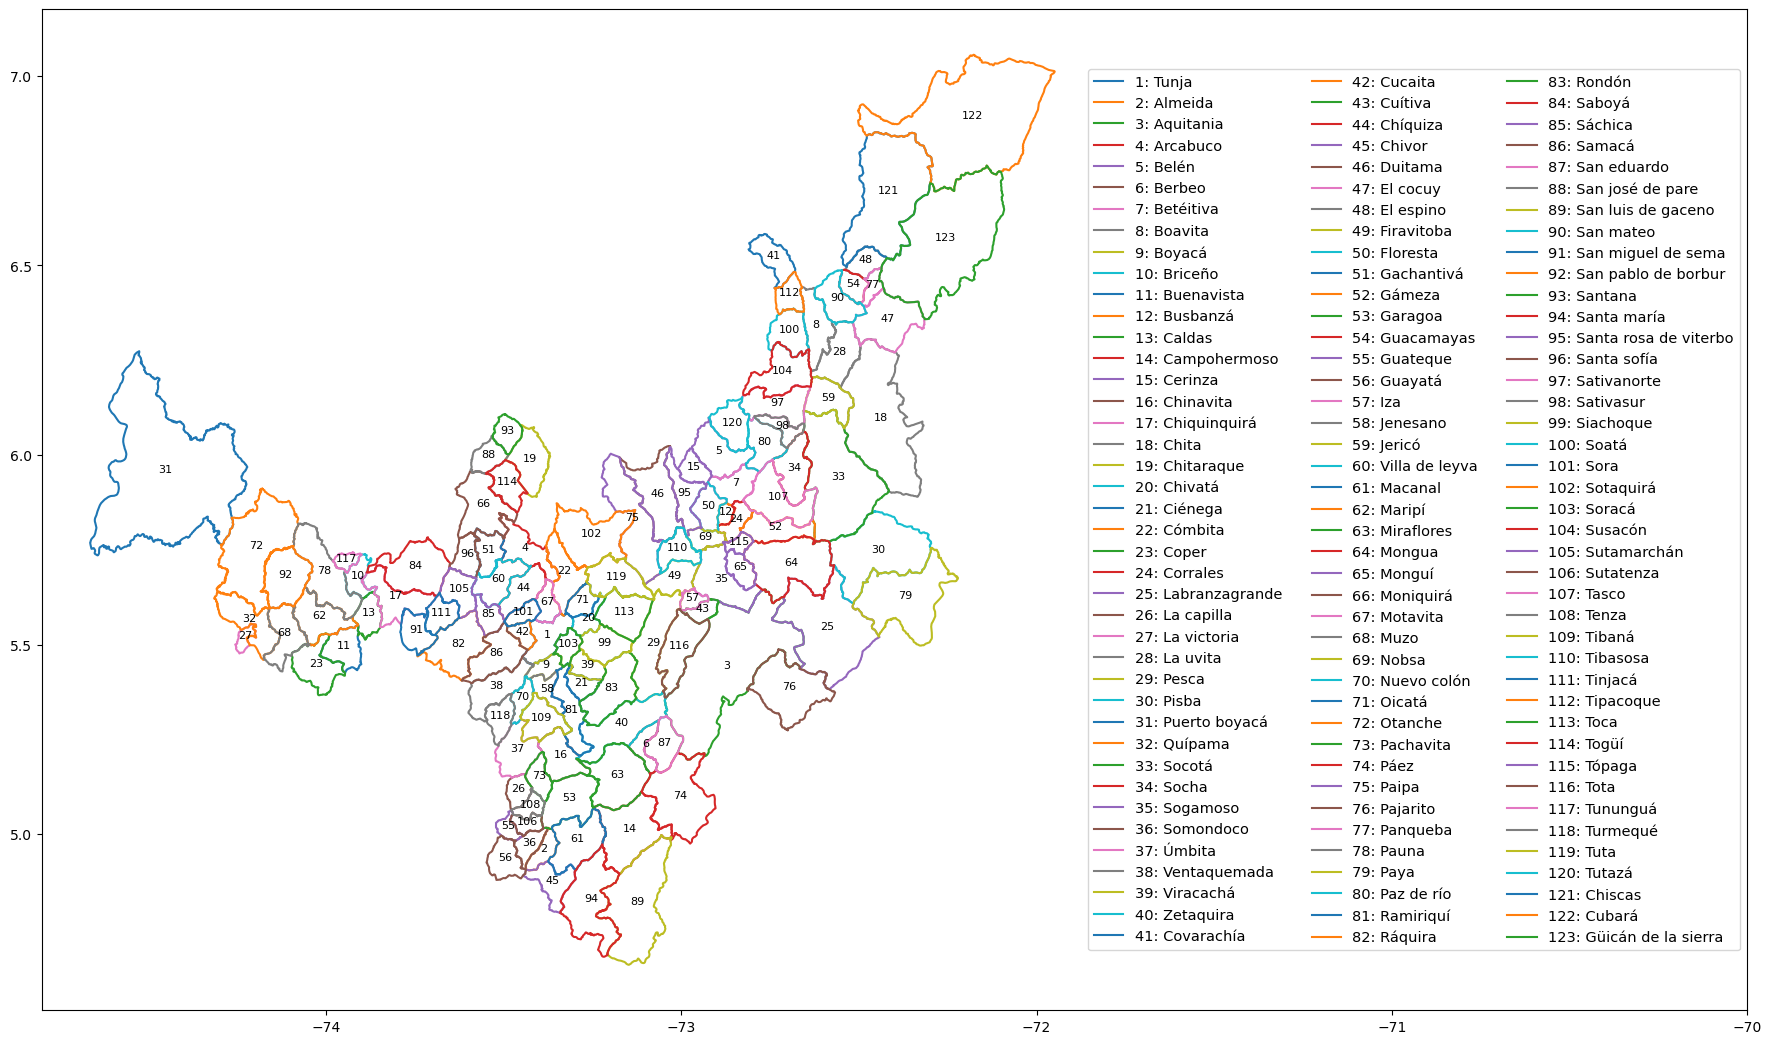

In [14]:
# Crear una figura y un eje
fig, ax = plt.subplots()
fig.set_size_inches(22, 13)

for i, polygon in enumerate(gdf_boyaca.geometry):
    x, y = polygon.exterior.xy
    ax.plot(x, y)
    centroid = polygon.centroid
    ax.annotate(str(i+1), (centroid.x, centroid.y), textcoords="offset points", xytext=(0,0), ha='center', fontsize=8)

# Etiquetas de leyenda
etiquetas_leyenda = [f"{i+1}: {gdf_boyaca.iloc[i]['municipality']}" for i in range(len(gdf_boyaca))]

# Agregar la leyenda al gráfico
ax.legend(labels=etiquetas_leyenda, fontsize=10.5, ncol=3, loc='center right')
# Agrandar el eje x para que quepa la leyenda
ax.set_xlim(right=-70)

# Mostrar el gráfico
plt.show()


In [31]:
# Filtrar los datos por año específico
pr_year = df_boyaca[df_boyaca['year'] == "2022"]
precip_avg = pr_year.groupby(['latitude', 'longitude','month'])['precip'].sum().reset_index()
precip_avg

latitude  longitude       month      precip
0     4.674999 -73.175003       Abril  497.139435
1     4.674999 -73.175003      Agosto  374.420715
2     4.674999 -73.175003   Diciembre   60.903263
3     4.674999 -73.175003       Enero   15.948543
4     4.674999 -73.175003     Febrero   95.744240
...        ...        ...         ...         ...
9031  7.024998 -72.075005       Marzo   89.737457
9032  7.024998 -72.075005        Mayo  314.136139
9033  7.024998 -72.075005   Noviembre  313.391937
9034  7.024998 -72.075005     Octubre  526.951721
9035  7.024998 -72.075005  Septiembre  300.475555

[9036 rows x 4 columns]

In [47]:
pr_month = pr_year[pr_year['time'].dt.month == 13]
pr_month

Empty DataFrame
Columns: [latitude, longitude, time, precip, municipality, year, month]
Index: []

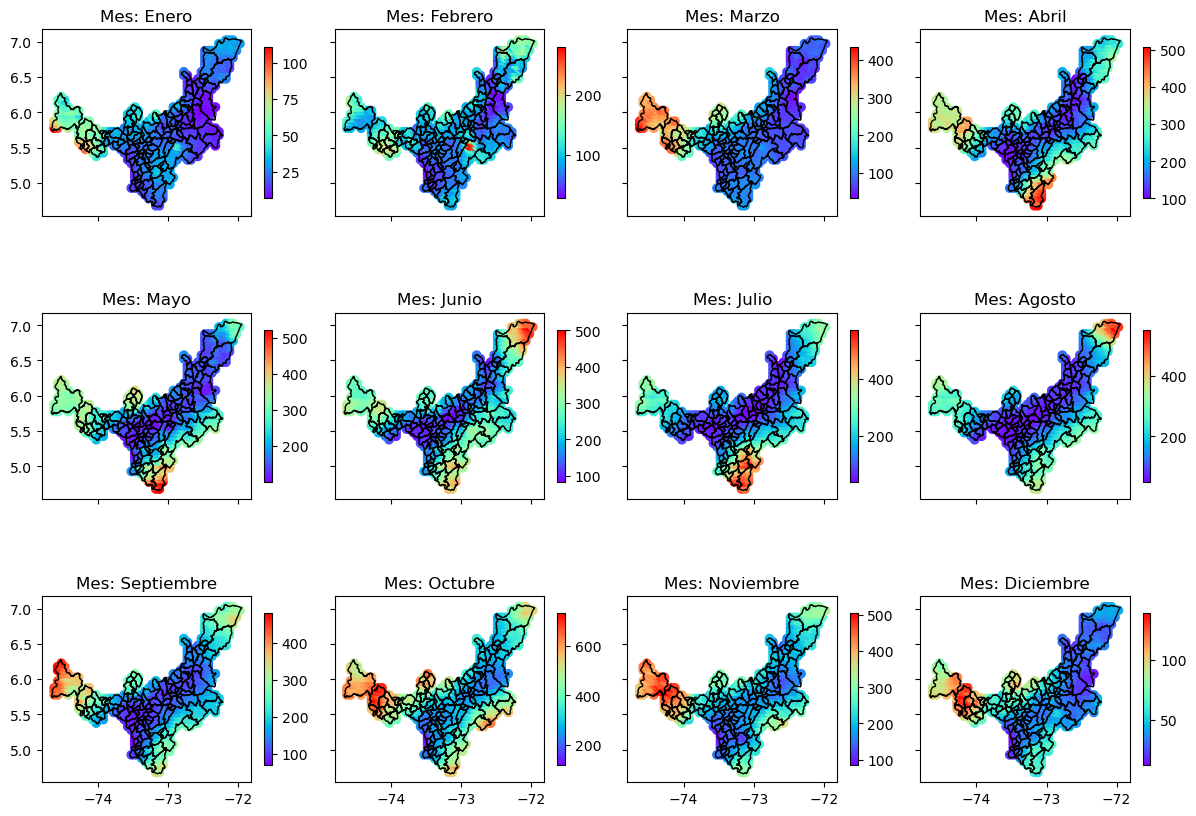

latitude  longitude        municipality     precip
0    4.674999 -73.175003  San Luis de Gaceno  60.903263
1    4.674999 -73.125008  San Luis de Gaceno  54.278519
2    4.724998 -73.175003  San Luis de Gaceno  69.265297
3    4.724998 -73.125008  San Luis de Gaceno  65.947151
4    4.774998 -73.275002         Santa María  66.603355
..        ...        ...                 ...        ...
748  6.974998 -72.025002              Cubará  42.006508
749  6.974998 -71.975006              Cubará  42.564156
750  7.024998 -72.175003              Cubará  41.322487
751  7.024998 -72.125008              Cubará  40.716236
752  7.024998 -72.075005              Cubará  42.993446

[753 rows x 4 columns]

In [56]:
# Filtrar los datos por año específico
pr_year = df_boyaca[df_boyaca['year'] == "2022"]

# Crear la cuadrícula de subtramas
fig, axes = plt.subplots(3, 4, figsize=(12, 9), sharex=True, sharey=True)

# sacar el valor minimos y maximos de precipitacion
maxprecip = pr_year['precip'].max()
minprecip = pr_year['precip'].min()
 
# Iterar sobre los meses
for month, ax in zip(range(1, 13), axes.flat):
    # Filtrar los datos por mes específico
    pr_month = pr_year[pr_year['time'].dt.month == month]

    # Obtener el nombre del mes en español
    month_name = calendar.month_name[month].capitalize()

    # Calcular el promedio de precipitación para cada punto
    precip_avg = pr_month.groupby(['latitude', 'longitude','municipality'])['precip'].sum().reset_index()
    if month == 2:
        precip_feb = precip_avg

    # Plot del mapa de calor en la subtrama actual
    im = ax.scatter(precip_avg['longitude'], precip_avg['latitude'], c=precip_avg['precip'], cmap='rainbow')
    gdf_boyaca.plot(ax=ax, color='none', edgecolor='k')
    ax.set_title(f'Mes: {month_name}')
    # Agregar una barra de color 
    fig.colorbar(im, ax=ax, shrink=0.5)


# Ajustar los espacios entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()
precip_avg

1. Gráfico de Análisis de Tendencias:
   - En este gráfico, se muestra la precipitación promedio a lo largo del tiempo en el área de Boyacá.
   - La línea azul representa el promedio de la precipitación en función del tiempo.
   - La línea roja discontinua indica la tendencia de la precipitación a lo largo del tiempo, calculada mediante una regresión lineal.
   - Si la línea roja tiene una pendiente positiva, indica un aumento en la precipitación a medida que pasa el tiempo, mientras que una pendiente negativa indica una disminución en la precipitación.

2. Gráfico de Anomalías y Variabilidad Interanual:
   - Este gráfico muestra las anomalías de precipitación y la variabilidad interanual en el área de Boyacá.
   - Las anomalías de precipitación se calculan restando el promedio anual de la precipitación de cada año individual.
   - El gráfico muestra la media de estas anomalías a lo largo del tiempo.
   - Los valores positivos indican que la precipitación en un año determinado fue superior al promedio anual, mientras que los valores negativos indican una precipitación por debajo del promedio.

3. Gráfico de Estacionalidad de la Precipitación:
   - Este gráfico representa la estacionalidad de la precipitación en el área de Boyacá.
   - Se calcula el promedio mensual de la precipitación.
   - Cada punto en el gráfico de dispersión representa el promedio mensual de la precipitación en un determinado mes a lo largo del tiempo.
   - Este gráfico nos permite identificar patrones estacionales en la precipitación. Por ejemplo, si hay una concentración de puntos más altos en ciertos meses, indica una estacionalidad marcada en esos meses.




In [ ]:
# Convertir las fechas a tipo np.datetime64
data_boyaca['time'] = data_boyaca.time.astype('datetime64[ns]')

# Análisis de tendencias
trends = np.polyfit(data_boyaca.time.values.astype(float), data_boyaca.precip.mean(dim=('latitude', 'longitude')).values, deg=1)
trend_line = np.polyval(trends, data_boyaca.time.values.astype(float))

# Anomalías y variabilidad interanual
annual_mean = data_boyaca.precip.groupby('time.year').mean(dim='time')
anomalies = data_boyaca.precip.groupby('time.year') - annual_mean
anomalies_mean = anomalies.mean(dim=('latitude', 'longitude'))

# Estacionalidad
monthly_mean = data_boyaca.precip.groupby('time.month').mean(dim='time')
seasonal_mean = monthly_mean.mean(dim='month')

# Correlaciones espaciales
correlation = np.corrcoef(data_boyaca.precip.mean(dim='time').values.reshape(-1), rowvar=False)

# Visualización de datos
plt.figure(figsize=(12, 6))
data_boyaca.precip.mean(dim=('latitude', 'longitude')).plot(label='Promedio')
plt.plot(data_boyaca.time, trend_line, 'r--', label='Tendencia')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Precipitación')
plt.title('Análisis de tendencias')

plt.figure(figsize=(12, 6))
anomalies_mean.plot()
plt.xlabel('Año')
plt.ylabel('Anomalía de Precipitación')
plt.title('Anomalías y variabilidad interanual')

# Calcular el promedio mensual
monthly_mean = data_boyaca.precip.resample(time='1M').mean()

# Obtener los valores de tiempo y precipitación promedio mensual
time_values = monthly_mean.time.values
precipitation_values = monthly_mean.mean(dim=('latitude', 'longitude')).values

# Gráfico de dispersión con NumPy array
plt.figure(figsize=(8, 6))
plt.scatter(time_values, precipitation_values, marker='o') # type: ignore
plt.xlabel('Tiempo')
plt.ylabel('Precipitación Promedio')
plt.title('Estacionalidad de la Precipitación')

plt.show()

# Calcular el promedio de precipitación en todo el periodo
mean_precipitation = data_boyaca.precip.mean(dim=('latitude', 'longitude'))

# Crear histograma de precipitación
plt.figure(figsize=(8, 6))
plt.hist(mean_precipitation, bins=20, edgecolor='black')
plt.xlabel('Precipitación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precipitación')
plt.show()


